In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/Task 3 and 4_Loan_Data.csv")

In [3]:
df

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
0,8153374,0,5221.545193,3915.471226,78039.38546,5,605,0
1,7442532,5,1958.928726,8228.752520,26648.43525,2,572,1
2,2256073,0,3363.009259,2027.830850,65866.71246,4,602,0
3,4885975,0,4766.648001,2501.730397,74356.88347,5,612,0
4,4700614,1,1345.827718,1768.826187,23448.32631,6,631,0
...,...,...,...,...,...,...,...,...
9995,3972488,0,3033.647103,2553.733144,42691.62787,5,697,0
9996,6184073,1,4146.239304,5458.163525,79969.50521,8,615,0
9997,6694516,2,3088.223727,4813.090925,38192.67591,5,596,0
9998,3942961,0,3288.901666,1043.099660,50929.37206,2,647,0


In [4]:
from sklearn.tree import DecisionTreeClassifier

def tree_based_binning(fico, default, max_leaf_nodes=10):
    tree = DecisionTreeClassifier(max_leaf_nodes=max_leaf_nodes)
    fico = np.array(fico).reshape(-1, 1)
    tree.fit(fico, default)

    thresholds = tree.tree_.threshold
    thresholds = thresholds[thresholds != -2]
    return sorted(set(thresholds))

In [5]:
thresholds = tree_based_binning(df['fico_score'], df['default'], max_leaf_nodes=10)
df['rating'] = df['fico_score'].apply(lambda x: sum(x > t for t in thresholds) + 1)


In [8]:
df

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default,rating
0,8153374,0,5221.545193,3915.471226,78039.38546,5,605,0,7
1,7442532,5,1958.928726,8228.752520,26648.43525,2,572,1,6
2,2256073,0,3363.009259,2027.830850,65866.71246,4,602,0,7
3,4885975,0,4766.648001,2501.730397,74356.88347,5,612,0,8
4,4700614,1,1345.827718,1768.826187,23448.32631,6,631,0,8
...,...,...,...,...,...,...,...,...,...
9995,3972488,0,3033.647103,2553.733144,42691.62787,5,697,0,10
9996,6184073,1,4146.239304,5458.163525,79969.50521,8,615,0,8
9997,6694516,2,3088.223727,4813.090925,38192.67591,5,596,0,7
9998,3942961,0,3288.901666,1043.099660,50929.37206,2,647,0,9


In [6]:
bucket_summary = df.groupby('rating')['default'].agg(['count', 'sum'])
bucket_summary['pd'] = bucket_summary['sum'] / bucket_summary['count']
print(bucket_summary)

        count  sum        pd
rating                      
1         168  121  0.720238
2          16    6  0.375000
3         117   72  0.615385
4          62   21  0.338710
5         434  208  0.479263
6         911  307  0.336992
7        1493  367  0.245814
8        1945  336  0.172751
9        3197  336  0.105099
10       1657   77  0.046470


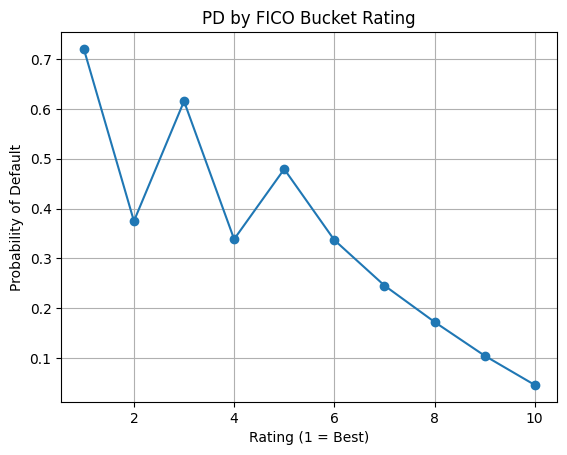

In [7]:
plt.plot(bucket_summary.index, bucket_summary['pd'], marker='o')
plt.title('PD by FICO Bucket Rating')
plt.xlabel('Rating (1 = Best)')
plt.ylabel('Probability of Default')
plt.grid(True)
plt.show()